# Minimal Example

In [1]:
import numpy as np
from nilearn import plotting
import nibabel as nb
from nilearn.input_data import NiftiMasker

In [2]:
beta_example = 'MVPA/sub-05/beta_0021.nii'
mask_fname = 'MVPA/mask_Left_AnG_angular_gyrus.nii'

(79, 95, 79)
float32
[[[nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]
  ...
  [nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]]

 [[nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]
  ...
  [nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]]]
17.519018173217773
1.4918233206712568


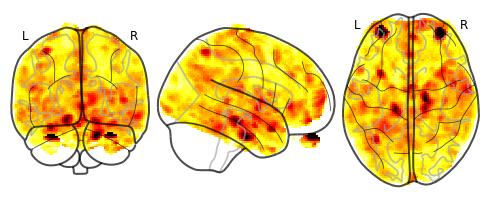

In [3]:
x = nb.load(beta_example)
data = x.get_fdata()
print(x.shape)
print(x.get_data_dtype())
print(data[:2])
print(np.nanmax(data)) # it isn't all nan although it looks like it
print(np.nanmean(data))
plotting.plot_glass_brain(beta_example) # image looks fine

## Recreating the error/warning faced with all other beta images

In [4]:
masker = NiftiMasker(mask_img=mask_fname, standardize=True)
fmri_masked = masker.fit_transform(beta_example) # mask it

C:\Users\L\AppData\Roaming\Python\Python37\site-packages\nilearn\image\resampling.py:584: RuntimeWarning: NaNs or infinite values are present in the data passed to resample. This is a bad thing as they make resampling ill-defined and much slower.
  fill_value=fill_value)
C:\Users\L\AppData\Roaming\Python\Python37\site-packages\nilearn\image\resampling.py:591: RuntimeWarning: invalid value encountered in greater
  vmin = min(data.min(), 0)
C:\Users\L\AppData\Roaming\Python\Python37\site-packages\nilearn\image\resampling.py:592: RuntimeWarning: invalid value encountered in less
  vmax = max(data.max(), 0)
C:\Users\L\AppData\Roaming\Python\Python37\site-packages\nilearn\signal.py:61: UserWarning: Standardization of 3D signal has been requested but would lead to zero values. Skipping.
  warnings.warn('Standardization of 3D signal has been requested but '
